## Exploratory Data Analysis - Automobile (Part 2: Data Analysis)

<img width="600" height="400" style="float: left;" src="Images/EDA_Automobile_Banner.jpg">

### 1. About data

<b>Contents:</b> Insurance risk symboling and normalized loss for each model, along with body and engine
specifications, and price.

#### Importing packages    

In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import xticks
%matplotlib inline


In [11]:
# Read data from CSV file
df=pd.read_csv("data/Automobile_data_cleaned.csv")

### 2. Data validation

In [12]:
df.shape

(183, 32)

In [13]:
# !pip install tabulate

In [14]:
from tabulate import tabulate
print(tabulate(df[["make","body-style","engine_size_cc","symboling","price"]].head(10), headers='keys', tablefmt='psql'))

+----+--------+--------------+------------------+-------------+---------+
|    | make   | body-style   |   engine_size_cc |   symboling |   price |
|----+--------+--------------+------------------+-------------+---------|
|  0 | audi   | sedan        |             1786 |           2 | 13950   |
|  1 | audi   | sedan        |             2228 |           2 | 17450   |
|  2 | audi   | sedan        |             2228 |           2 | 15250   |
|  3 | audi   | sedan        |             2228 |           1 | 17710   |
|  4 | audi   | wagon        |             2228 |           1 | 18920   |
|  5 | audi   | sedan        |             2146 |           1 | 23875   |
|  6 | audi   | hatchback    |             2146 |           0 | 17859.2 |
|  7 | bmw    | sedan        |             1769 |           2 | 16430   |
|  8 | bmw    | sedan        |             1769 |           0 | 16925   |
|  9 | bmw    | sedan        |             2687 |           0 | 20970   |
+----+--------+--------------+--------

In [15]:
df.head(2)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,peak-rpm,city-mpg,highway-mpg,price,num_doors,num_cylinders,engine_size_cc,power_to_weight_ratio,risky_or_safe,is_risky
0,2,164.0,audi,gas,std,four,sedan,Front Wheel Drive,front,99.8,...,5500,24,30,13950.0,4,4,1786,0.043646,risky,1
1,2,164.0,audi,gas,std,four,sedan,Four Wheel Drive,front,99.4,...,5500,18,22,17450.0,4,5,2228,0.040722,risky,1


### 3. Data analysis

### 3.1. Univariate Analysis
Univariate analysis is the simplest form of analyzing data. “Uni” means “one”, so in other words your data has only one variable.

<b>Color codes: </b>

<img width="800" height="600" style="float: left;" src="Images/Color_codes.png">

Set some global values for graph. 

In [16]:
title_color = "navy"
plot_color = "crimson"
plot_color_secondary = "deepskyblue"
y_title_margin = 1.0

#### 1.1 Vehicle make frequency diagram

In [17]:
# df.make.value_counts().nlargest(10).plot(kind='bar', figsize=(10,5))
# plt.title("Vehicles count by Brand")
# plt.ylabel('Vehicles count')
# plt.xlabel('Brand');


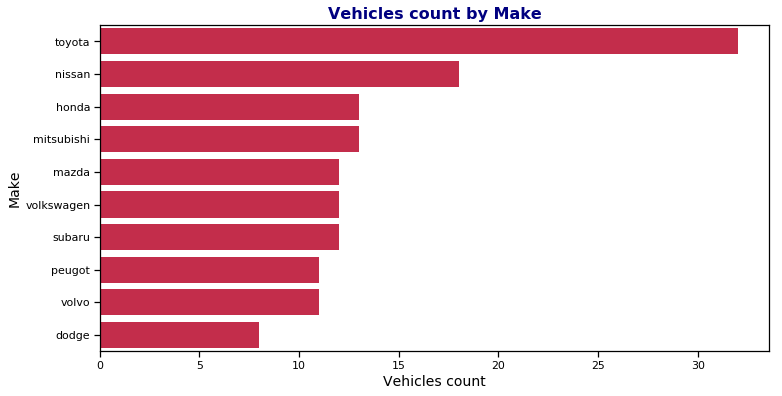

In [47]:
fig, ax = plt.subplots(figsize=(12,6), ncols=1, nrows=1)
fig.patch.set_alpha(0.5)
ax.set_title("Vehicles count by Make", y = y_title_margin, color=title_color, fontsize=16, fontweight="bold")
ax.patch.set_alpha(0)

top_10_makers = df["make"].value_counts()[:10].to_frame()
symbol_dist = sns.barplot(top_10_makers["make"],top_10_makers.index, color=plot_color, ax=ax)
# symbol_dist = sns.countplot(df["make"], color=plot_color, ax=ax, order = df['make'].value_counts().index)
# symbol_dist.set_ylabel('Vehicles count',fontsize=14 )
# symbol_dist.set_xlabel('Make',fontsize=14)
symbol_dist.set_ylabel('Make',fontsize=14 )
symbol_dist.set_xlabel('Vehicles count',fontsize=14)
xticks(rotation=0)

fig.savefig('Images/make_dist.png',dpi=fig.dpi,bbox_inches='tight')

#### 1.2 Insurance risk ratings Histogram

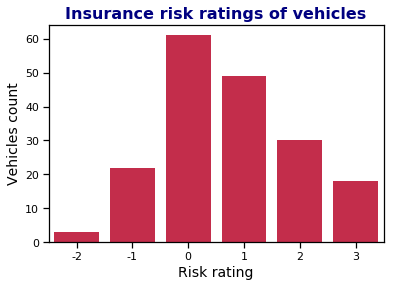

In [48]:
# df.symboling.hist(bins=6,color='red');
# plt.title("Insurance risk ratings of vehicles")
# plt.ylabel('Vehicles count')
# plt.xlabel('Risk rating');

fig, ax = plt.subplots(figsize=(6,4), ncols=1, nrows=1)
fig.patch.set_alpha(0.5)
ax.set_title("Insurance risk ratings of vehicles", y = y_title_margin, color=title_color, fontsize=16, fontweight="bold")
ax.patch.set_alpha(0)

symbol_dist = sns.countplot(df["symboling"], color=plot_color, ax=ax)
symbol_dist.set_ylabel('Vehicles count',fontsize=14 )
symbol_dist.set_xlabel('Risk rating',fontsize=14)

fig.savefig('Images/symboling_dist.png',dpi=fig.dpi,bbox_inches='tight')

#### 1.3 Normalized losses histogram

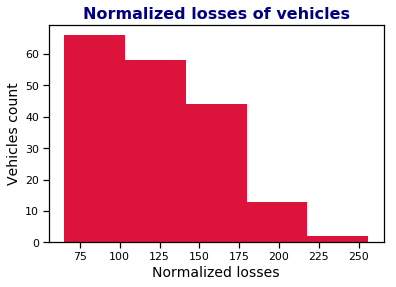

In [49]:
fig, ax = plt.subplots(figsize=(6,4), ncols=1, nrows=1)
fig.patch.set_alpha(0.5)
ax.set_title("Normalized losses of vehicles", y = y_title_margin, color=title_color, fontsize=16, fontweight="bold")
ax.patch.set_alpha(0)

symbol_dist = sns.distplot(df['normalized-losses'], bins=5, kde = False, ax=ax, hist_kws={"linewidth": 1, "alpha": 1, "color": plot_color})
symbol_dist.set_ylabel('Vehicles count',fontsize=14 )
symbol_dist.set_xlabel('Normalized losses',fontsize=14)

fig.savefig('Images/normalized-losses_dist.png',dpi=fig.dpi,bbox_inches='tight')

#### 1.4 Horse power histogram

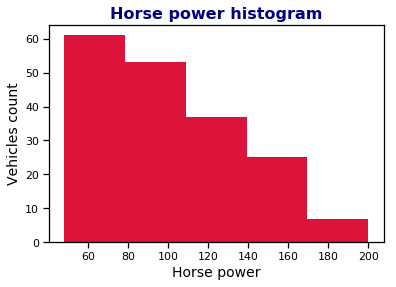

In [50]:
fig, ax = plt.subplots(figsize=(6,4), ncols=1, nrows=1)
fig.patch.set_alpha(0.5)
ax.set_title("Horse power histogram", y = y_title_margin, color=title_color, fontsize=16, fontweight="bold")
ax.patch.set_alpha(0)

symbol_dist = sns.distplot(df['horsepower'], bins=5, kde = False, ax=ax, hist_kws={"linewidth": 1, "alpha": 1, "color": plot_color})
symbol_dist.set_ylabel('Vehicles count',fontsize=14 )
symbol_dist.set_xlabel('Horse power',fontsize=14)

fig.savefig('Images/horsepower_dist.png',dpi=fig.dpi,bbox_inches='tight')

#### 1.5 Fuel type distribution

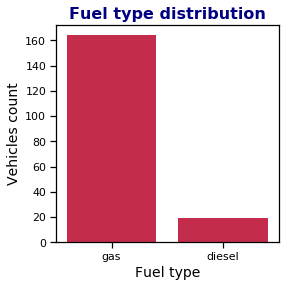

In [51]:
fig, ax = plt.subplots(figsize=(4,4), ncols=1, nrows=1)
fig.patch.set_alpha(0.5)
ax.set_title("Fuel type distribution", y = y_title_margin, color=title_color, fontsize=16, fontweight="bold")
ax.patch.set_alpha(0)

symbol_dist = sns.countplot(df["fuel-type"], color=plot_color, ax=ax)
symbol_dist.set_ylabel('Vehicles count',fontsize=14 )
symbol_dist.set_xlabel('Fuel type',fontsize=14)

fig.savefig('Images/fuel_type_dist.png',dpi=fig.dpi,bbox_inches='tight')

#### 1.6 Fuel type (aspiration) distribution

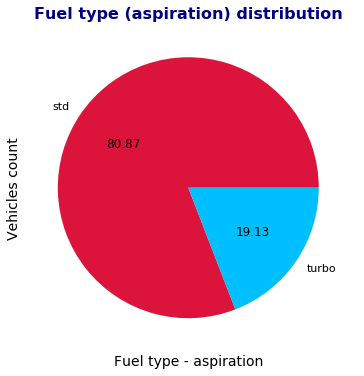

In [52]:
fig, ax = plt.subplots(figsize=(6,4), ncols=1, nrows=1)
fig.patch.set_alpha(0.5)
ax.set_title("Fuel type (aspiration) distribution", y = y_title_margin, color=title_color, fontsize=16, fontweight="bold")
ax.patch.set_alpha(0)

symbol_dist = df['aspiration'].value_counts().plot.pie(figsize=(6, 6), autopct='%.2f', colors=[plot_color, plot_color_secondary])
#symbol_dist = sns.countplot(df["aspiration"], color=plot_color, ax=ax)
symbol_dist.set_ylabel('Vehicles count',fontsize=14 )
symbol_dist.set_xlabel('Fuel type - aspiration',fontsize=14)

fig.savefig('Images/fuel_type_aspiration_dist.png',dpi=fig.dpi,bbox_inches='tight')

#### 1.7 Curb weight distribution

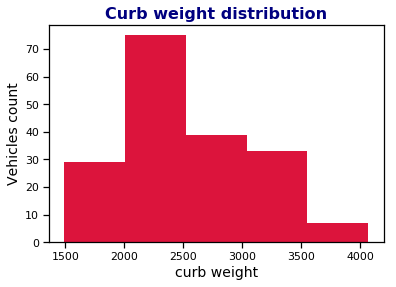

In [53]:
fig, ax = plt.subplots(figsize=(6,4), ncols=1, nrows=1)
fig.patch.set_alpha(0.5)
ax.set_title("Curb weight distribution", y = y_title_margin, color=title_color, fontsize=16, fontweight="bold")
ax.patch.set_alpha(0)

symbol_dist = sns.distplot(df['curb-weight'], bins=5, kde = False, ax=ax, hist_kws={"linewidth": 1, "alpha": 1, "color": plot_color})
symbol_dist.set_ylabel('Vehicles count',fontsize=14 )
symbol_dist.set_xlabel('curb weight',fontsize=14)

fig.savefig('Images/curb_weight_dist.png',dpi=fig.dpi,bbox_inches='tight')

#### 1.8 Drive wheels distribution

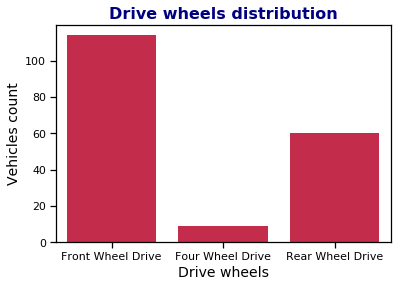

In [54]:
fig, ax = plt.subplots(figsize=(6,4), ncols=1, nrows=1)
fig.patch.set_alpha(0.5)
ax.set_title("Drive wheels distribution", y = y_title_margin, color=title_color, fontsize=16, fontweight="bold")
ax.patch.set_alpha(0)

symbol_dist = sns.countplot(df["drive-wheels"], color=plot_color, ax=ax)
symbol_dist.set_ylabel('Vehicles count',fontsize=14 )
symbol_dist.set_xlabel('Drive wheels',fontsize=14)

fig.savefig('Images/drive-wheels_dist.png',dpi=fig.dpi,bbox_inches='tight')

#### 1.8 Number of doors distribution

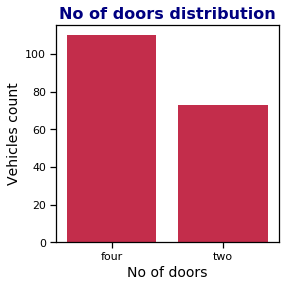

In [55]:
fig, ax = plt.subplots(figsize=(4,4), ncols=1, nrows=1)
fig.patch.set_alpha(0.5)
ax.set_title("No of doors distribution", y = y_title_margin, color=title_color, fontsize=16, fontweight="bold")
ax.patch.set_alpha(0)

symbol_dist = sns.countplot(df["num-of-doors"], color=plot_color, ax=ax)
symbol_dist.set_ylabel('Vehicles count',fontsize=14 )
symbol_dist.set_xlabel('No of doors',fontsize=14)

fig.savefig('Images/num_of_doors_dist.png',dpi=fig.dpi,bbox_inches='tight')

<b>Findings:</b><br />
We have taken some key features of the automobile dataset for this analysis and below are our findings.

* <b>Toyota</b> is the make of the car which has most number of vehicles with around <b>20%</b> than the 2nd highest Nissan

* Most preferred fuel type for the customer is standard vs trubo having more than <b>80%</b> of the choice.

* For drive wheels, <b>front wheel drive</b> has most number of cars followed by rear wheel and four wheel. 

* Curb weight of the cars are distributed between <b>1500 and 4000</b> approximately

* Symboling or the insurance risk rating have the ratings between -3 and 3 however for our dataset it starts from -2. There are more cars in the range of <b>0 and 1</b>.

* Normalized losses which is the average loss payment per insured vehicle year is has more number of cars in the range between <b>65 and 150</b>.

### 4. Correlation Analysis


* Covariance is a measure of how much two random variables change together.
* The sign of the covariance therefore shows the tendency in the linear relationship between the variables. The magnitude of the covariance is not easy to interpret because it is not normalized. 
* The normalized version of the covariance is called the correlation coefficient.
* The correlation matrix is a bit easier to understand, since the values are normalized. 
* The diagonal values of the correlation matrix are all 1.0, as a result of the normalization. 
* The magnitudes of the correlation values between the variables range between -1.0 and +1.0. A magnitude closer to +1.0 or -1.0 indicates a high correlation.

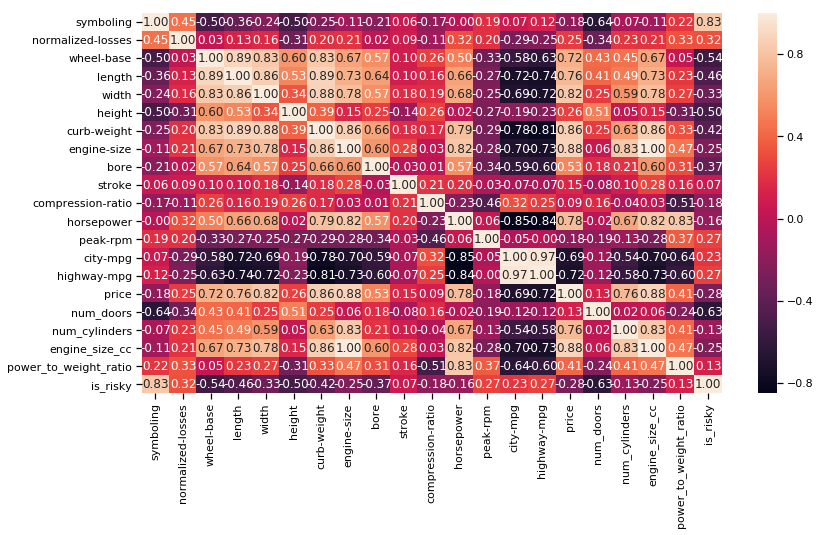

In [60]:
corr = df.corr()
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.5})
plt.figure(figsize=(13,7))
a = sns.heatmap(corr, annot=True, fmt='.2f')
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=0)

plt.savefig('Images/automobile_dataset_cor.png', bbox_inches='tight')

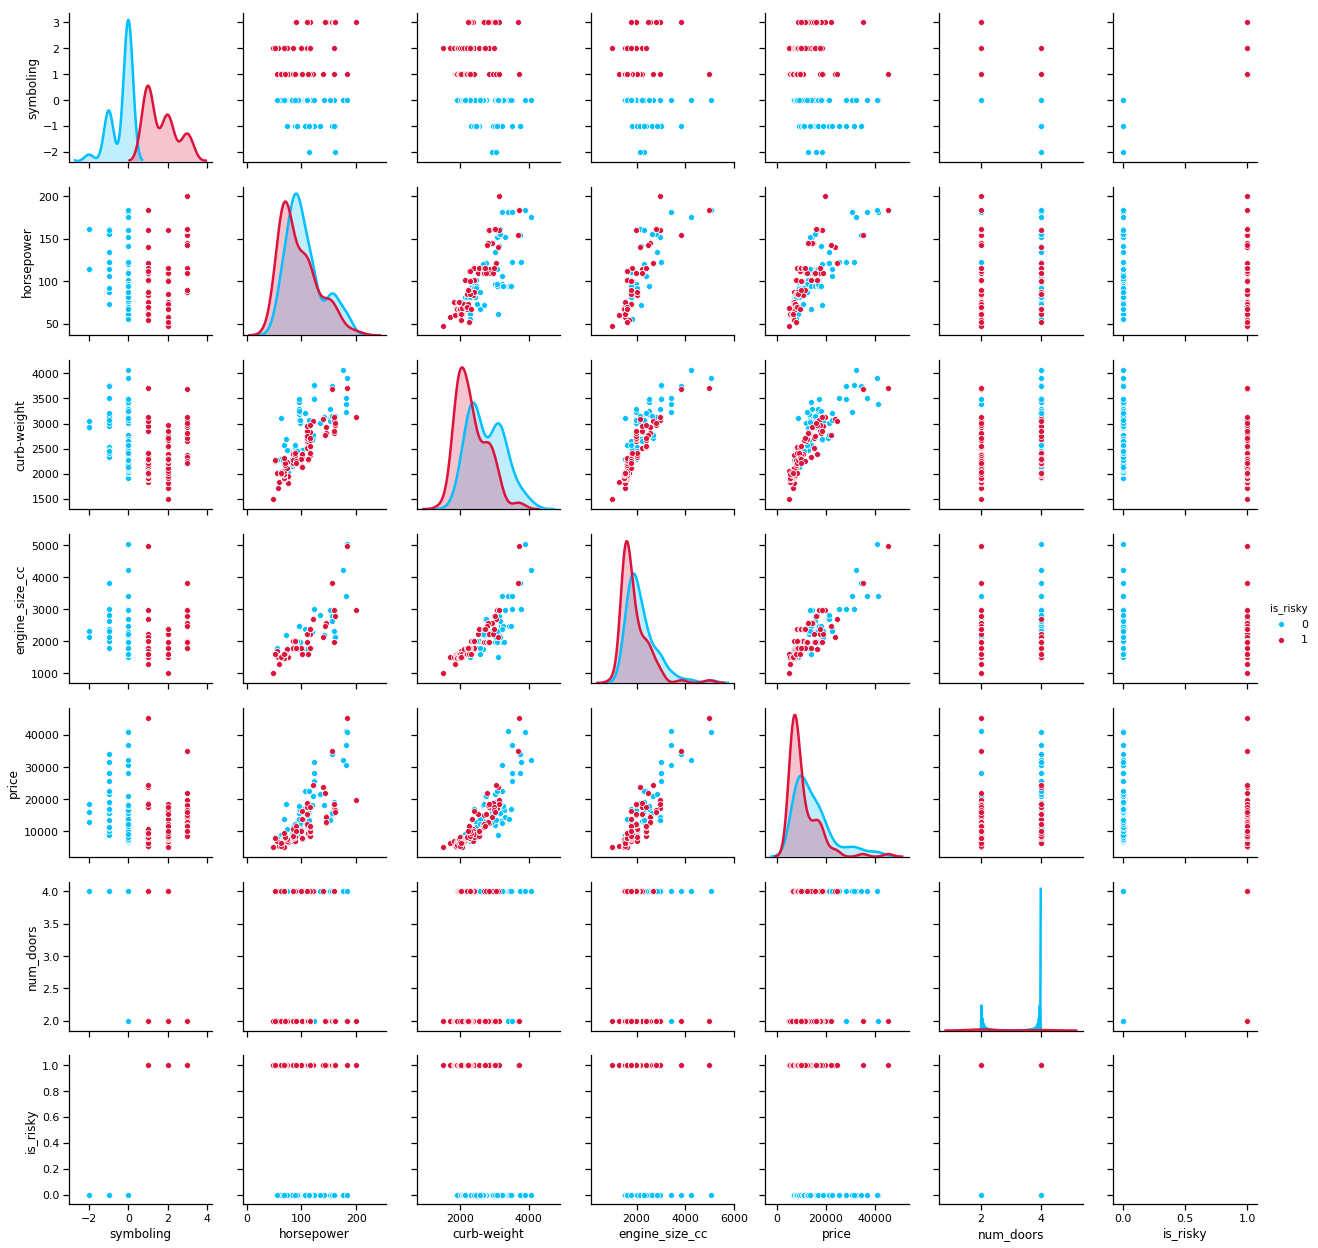

In [83]:
palette ={0:plot_color_secondary,1:plot_color}
df_numerics = df[["symboling", "horsepower", "curb-weight", "engine_size_cc", "price", "num_doors", "is_risky"]]
#plt.figure(figsize=(20,20))
sns.pairplot(df_numerics, diag_kind = "kde", kind = "scatter",hue="is_risky", palette=palette)   # plot_kws = {'alpha': 0.4, 's': 50, 'edgecolor': 'k'}
# plt.suptitle('Automobile dataset - pairplot', color=title_color, fontsize=16, fontweight="bold")
plt.savefig('Images/automobile_dataset_pairplot.png', bbox_inches='tight')


<b>Findings:</b><br />
We did analysis whether car is risky or not based on various columns on automobile dataset and below are our findings.

* Less horsepower (<130) is more risky compare to higher horsepower (>130).
* Car's horsepower below <130  and curbe-weight < 2500 is 90% risky. 
* Price below 20,000 dollars and engine cc below 3,000 is 95% risky.
* Price below 20,000 dollars and horsepower below <150 is 95% risky.